In [1]:
import pandas as pd
import numpy as np
from random import choice, random , randint
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
from tqdm import tqdm

# Importar dados
- Importar dados gerados no treinamento além de recriar os vetores words_vocab e words_vector

In [2]:
df = pd.read_csv('word_embedding_49.csv', index_col='word')

words_vocab = df.index
words_vector = df.values

words2idx = {w:n for n,w in enumerate(words_vocab)}
idx2words = {n:w for n,w in enumerate(words_vocab)}

# Redução de dimensionalidade
- Utilização do PCA do Sklearn para reduzir as dimensões e poder plotar num gráfico 2d

In [3]:
pca = PCA(n_components=2)
words_2d = pca.fit_transform(words_vector)

- Taxa de variância explicada

In [4]:
print (pca.explained_variance_ratio_)
print (pca.explained_variance_ratio_.sum())

[0.03281898 0.02739503]
0.06021401678715181


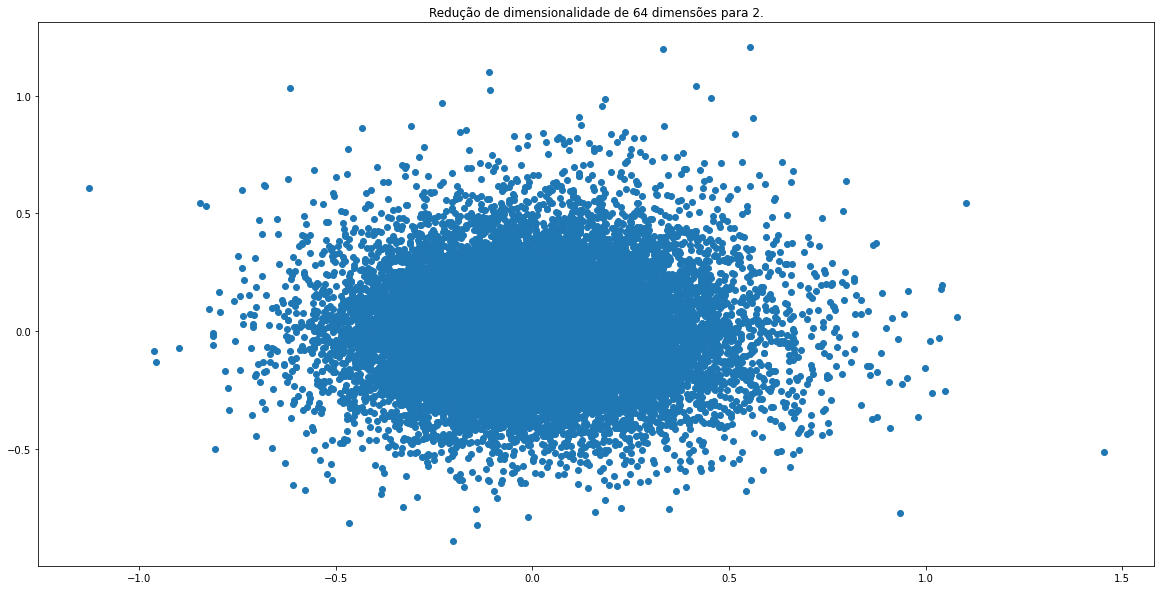

In [5]:
plt.figure(figsize=(20, 10))
plt.scatter(words_2d[:,0], words_2d[:,1])
plt.title('Redução de dimensionalidade de 64 dimensões para 2.')
plt.show()

- A análise baseada nessa redução de 64 dimensões para 2 com uma taxa de explicação de 6% não traria resultados bons.

---
# Utilizando método de similaridade do coseno

In [6]:
def n_mais_similares(n, palavra):
    if palavra not in words_vocab:
        return 'Palavra não encontrada'
    
    word_indice = words_vocab.get_loc(palavra) # pega o índice
    word_vector = words_vector[word_indice] # pega o vetor

    similarity_matrix = cosine_similarity(np.expand_dims(word_vector, axis=0), words_vector)
    # calculando a similaridade da palavra escolhida com todas as palavras do vocabulário

    result = [[k, v] for k,v in enumerate(similarity_matrix.reshape(-1))] # criando um índice para cada vetor
    
    result = sorted([(idx2words[k], round(v, 3)) for k, v in result if idx2words[k] != palavra], key=lambda item: item[1], reverse=True)
    # ordenando o vetor a partir do maior valor até o menor, e retirando também nele justamente a comparação de uma palavra com ela mesma,
    # que fica dentro do vocabulário. 
    
    return result[:n] # retorna as n primeiras palavras

In [10]:
palavra_sorteada = choice(words_vocab)
print (f'Palavra: {palavra_sorteada}')
n_mais_similares(10, palavra_sorteada)

Palavra: marrom


[('cinza', 0.465),
 ('grava', 0.462),
 ('distante', 0.45),
 ('visual', 0.443),
 ('bivar', 0.443),
 ('ilustracoes', 0.429),
 ('escuro', 0.427),
 ('louisiana', 0.421),
 ('analisar', 0.418),
 ('comercializar', 0.414)]

In [13]:
palavra_sorteada = choice(words_vocab)
print (f'Palavra: {palavra_sorteada}')
n_mais_similares(10, palavra_sorteada)

Palavra: utero


[('gemeos', 0.609),
 ('cobaias', 0.578),
 ('matam', 0.577),
 ('invasivo', 0.566),
 ('espontaneamente', 0.553),
 ('arrasta', 0.547),
 ('fisiologicas', 0.53),
 ('fisiologicos', 0.527),
 ('cancer', 0.522),
 ('produzir', 0.515)]

In [17]:
palavra_sorteada = choice(words_vocab)
print (f'Palavra: {palavra_sorteada}')
n_mais_similares(10, palavra_sorteada)

Palavra: venus


[('formacoes', 0.533),
 ('saturno', 0.512),
 ('perfeitos', 0.508),
 ('comunicar', 0.492),
 ('diametro', 0.486),
 ('dificilmente', 0.481),
 ('resolvendo', 0.473),
 ('funcao', 0.464),
 ('aprendizagem', 0.462),
 ('aereos', 0.46)]

In [31]:
palavra_sorteada = choice(words_vocab)
print (f'Palavra: {palavra_sorteada}')
n_mais_similares(10, palavra_sorteada)

Palavra: funcionar


[('adicionar', 0.547),
 ('algoritmo', 0.484),
 ('bug', 0.484),
 ('treinador', 0.483),
 ('qi', 0.483),
 ('k', 0.482),
 ('ampliando', 0.479),
 ('eolico', 0.47),
 ('exercitar', 0.467),
 ('escondidos', 0.465)]

In [45]:
palavra_sorteada = choice(words_vocab)
print (f'Palavra: {palavra_sorteada}')
n_mais_similares(10, palavra_sorteada)

Palavra: lutas


[('maria', 0.518),
 ('quaisquer', 0.459),
 ('areia', 0.448),
 ('comemoracoes', 0.437),
 ('unida', 0.431),
 ('vicente', 0.421),
 ('revoltas', 0.41),
 ('mentiu', 0.409),
 ('interacao', 0.397),
 ('representacoes', 0.397)]

In [50]:
palavra_sorteada = choice(words_vocab)
print (f'Palavra: {palavra_sorteada}')
n_mais_similares(10, palavra_sorteada)

Palavra: brics


[('guangzhou', 0.495),
 ('atras', 0.488),
 ('dialogo', 0.486),
 ('isolada', 0.484),
 ('telefonema', 0.479),
 ('especulativo', 0.478),
 ('encerrar', 0.472),
 ('muculmanos', 0.462),
 ('eua', 0.446),
 ('diplomatas', 0.44)]

In [58]:
palavra_sorteada = choice(words_vocab)
print (f'Palavra: {palavra_sorteada}')
n_mais_similares(10, palavra_sorteada)

Palavra: viver


[('agitada', 0.554),
 ('apaixonada', 0.524),
 ('conhecer', 0.514),
 ('excelente', 0.506),
 ('millennial', 0.505),
 ('genitais', 0.503),
 ('maluco', 0.5),
 ('joinville', 0.481),
 ('lembre', 0.477),
 ('sentir', 0.474)]